In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'],index_col='date')
df[:5]

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
df = df.loc[(df['value']>df['value'].quantile(0.025))&(df['value']<df['value'].quantile(0.975))]
df[:5]

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [4]:
df_bar = df.groupby([df.index.year, df.index.month_name()]).mean().value.unstack()


<AxesSubplot: xlabel='Years', ylabel='Average Page Views'>

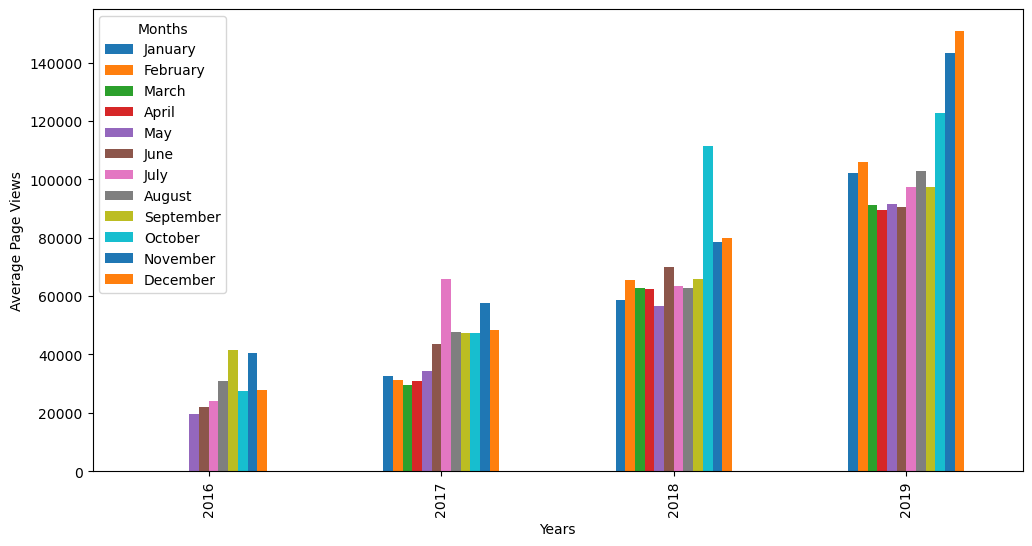

In [5]:
#List of months to re order the table in correct monthly order
months = ['January','February','March','April','May','June','July','August','September','October','November',
          'December']
df_bar = df.groupby([df.index.year, df.index.month_name()]).mean().value.unstack()
# Organises the column names by month in order by 'reshaping'
df_bar = df_bar[months]
fig, ax =plt.subplots(figsize=(12,6))#Set up plot environment 
df_bar.columns.name = "Months"#Set legend name 
df_bar.plot(kind="bar", figsize=(12, 6), xlabel="Years", ylabel="Average Page Views",ax=ax)#Bar plot



In [7]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [10]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


<AxesSubplot: xlabel='year', ylabel='value'>

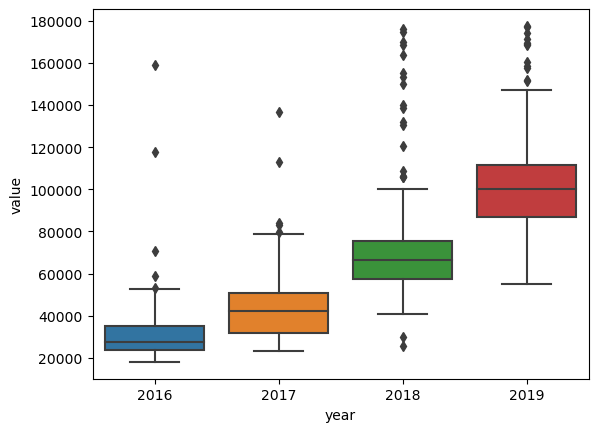

In [15]:
sns.boxplot(data = df_box,x='year',y='value')

<AxesSubplot: xlabel='month', ylabel='value'>

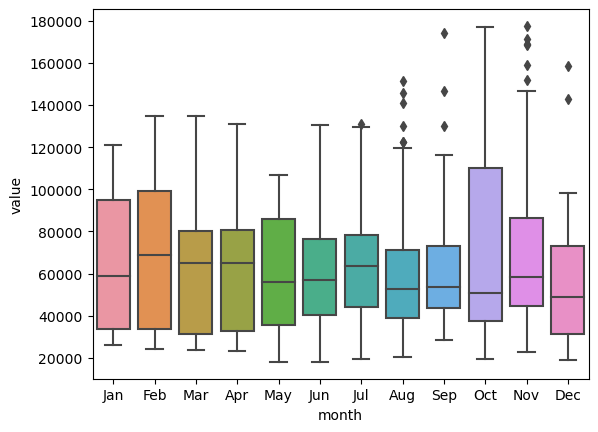

In [23]:
sns.boxplot(x='month',y='value',data=df_box,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov'
                                                   ,'Dec'])

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

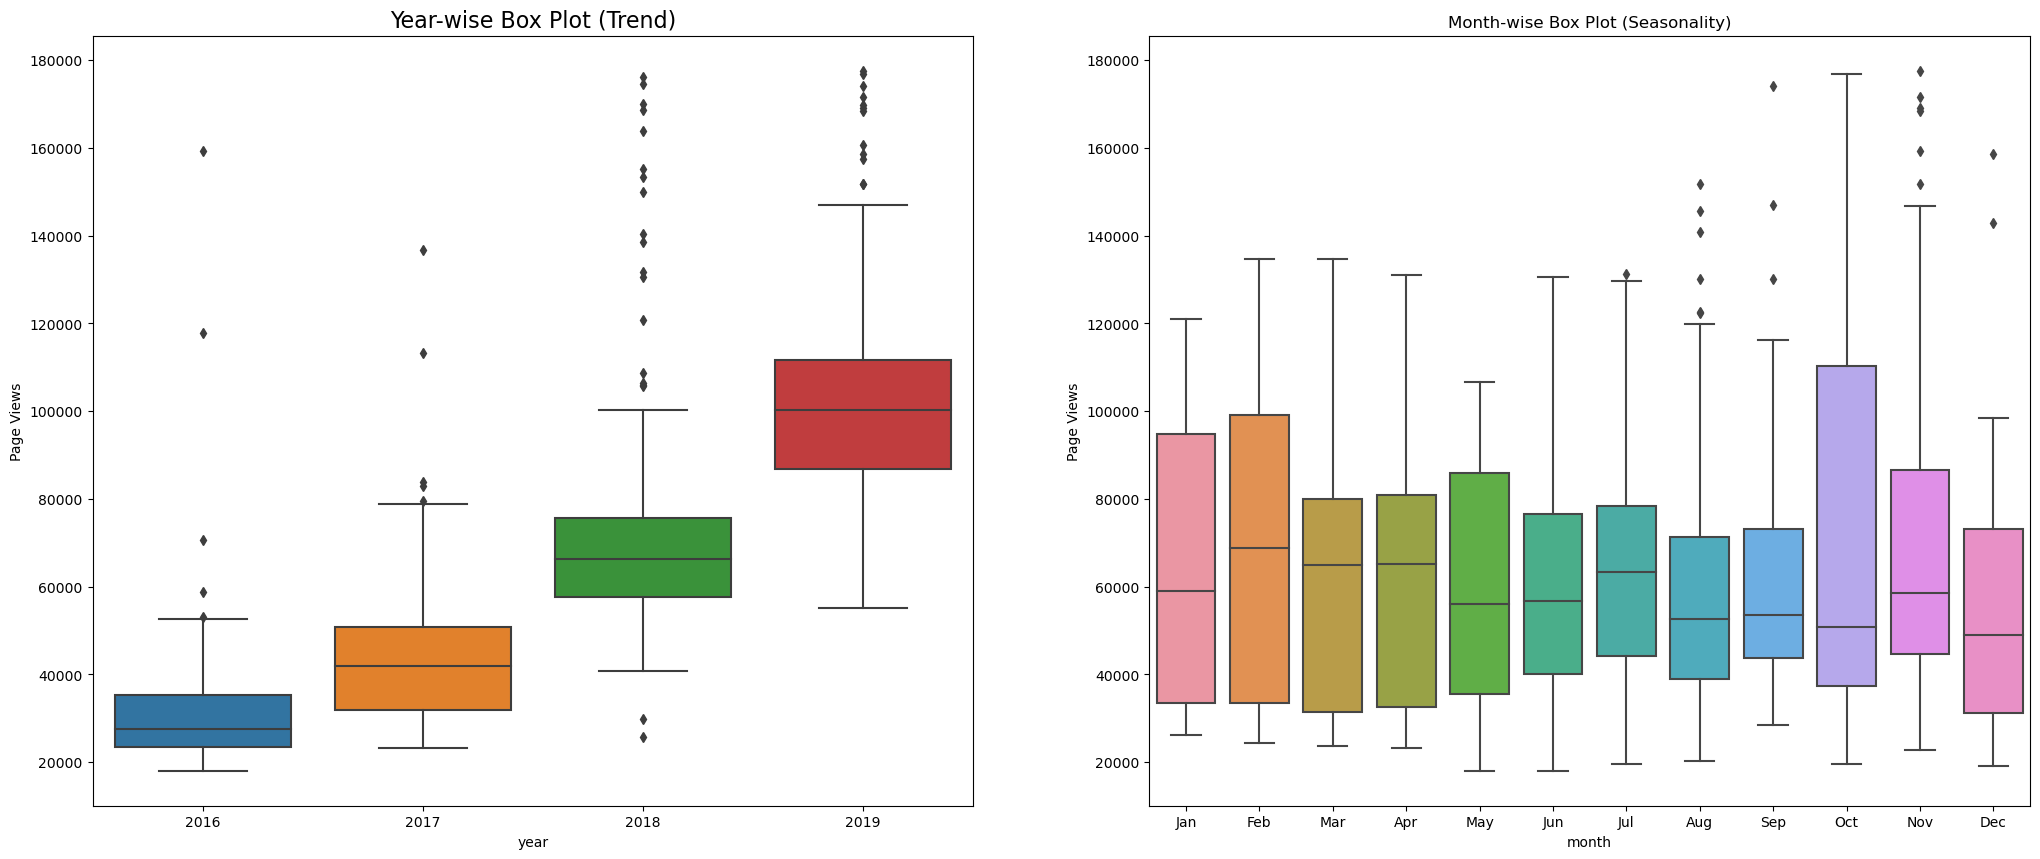

In [57]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,10))
x = sns.boxplot(data = df_box,x='year',y='value',ax=ax1)
y = sns.boxplot(x='month',y='value',data=df_box,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov'
                                                   ,'Dec'],ax=ax2)
ax1.set_ylabel('Page Views')
ax2.set_ylabel('Page Views')
ax1.set_xlabel('Year')
ax2.set_xlabel('Month')
ax1.set_title('Year-wise Box Plot (Trend)',fontsize='16')
ax2.set_title('Month-wise Box Plot (Seasonality)')

In [58]:

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'],index_col=['date'])

# Clean data - filter days when the page views were in the top 2.5% or bottom 2.5% of the dataset.
df = df.loc[(df['value']>df['value'].quantile(0.025))&(df['value']<df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(14,6))
    ax.set_xlabel('Date',fontsize=13)
    ax.plot(df.index,df['value'])
    ax.set_ylabel('Page Views',fontsize=13)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019',fontsize=13)

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig



def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    #This resamples the data in groups of months and then takes the average of all the data in that month
    df_bar = df.groupby([df.index.year, df.index.month_name()]).mean().value.unstack()
    #groupby - groupby splits into the args (year and month), the mean takes the mean value for each month by year
    #unstack returns the new data frame with new column labels 

    # Draw bar plot
    #List of months to re order the table in correct monthly order
    months = ['January','February','March','April','May','June','July','August','September','October','November',
          'December']
    df_bar = df.groupby([df.index.year, df.index.month_name()]).mean().value.unstack()
    # Organises the column names by month in order by 'reshaping'
    df_bar = df_bar[months]
    fig, ax = plt.subplots(figsize=(12,6))#Set up plot environment 
    df_bar.columns.name = "Months"#Set legend name 
    df_bar.plot(kind="bar", figsize=(12, 6), xlabel="Years", ylabel="Average Page Views",ax=ax)#Bar plot

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,10))
    x = sns.boxplot(data = df_box,x='year',y='value',ax=ax1)
    y = sns.boxplot(x='month',y='value',data=df_box,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov'
                                                   ,'Dec'],ax=ax2)
    ax1.set_ylabel('Page Views')
    ax2.set_ylabel('Page Views')
    ax1.set_xlabel('Year')
    ax2.set_xlabel('Month')
    ax1.set_title('Year-wise Box Plot (Trend)',fontsize='16')
    ax2.set_title('Month-wise Box Plot (Seasonality)')




    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
